In [1]:
!nvidia-smi

Thu Apr 25 07:28:25 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
HOME = os.getcwd()
print(HOME)


/content


In [4]:
# Pip install method (recommended)
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
#ultralytics.checks().gpu()

import torch
if torch.cuda.is_available():
    print("GPU is available!")
    print(f"GPU device name: {torch.cuda.get_device_name(0)}")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
else:
    print("GPU is not available.")



GPU is available!
GPU device name: Tesla T4
Number of GPUs: 1


In [5]:
from ultralytics import YOLO
from IPython.display import display, Image

In [6]:
%cd {HOME}
!mkdir datasets
%cd datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="jelkx82laCQlDM8vIm2o")
project = rf.workspace("crime-detection").project("guns_n_knives-h4bky")
dataset = project.version(1).download("yolov8")

/content
/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.2, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to guns_n_knives-1 in yolov8:: 100%|██████████| 19282/19282 [00:03<00:00, 6222.61it/s]


In [7]:
print(dataset.location)

/content/datasets/guns_n_knives-1


In [9]:
%cd {HOME}

"""
MUST FIX in data.yaml
train: /content/datasets/guns_n_knives-1/train/images
val: /content/datasets/guns_n_knives-1/valid/images
test: /content/datasets/guns_n_knives-1/test/images
"""

# Custom Training
!yolo task=detect mode=train model={HOME}/drive/MyDrive/model/best.pt data={dataset.location}/data.yaml epochs=20 imgsz=416 plots=True

/content
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/model/best.pt, data=/content/datasets/guns_n_knives-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

In [25]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1714030312.6da46a42c6ac.1579.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch4220.jpg  weights
P_curve.png					    train_batch4221.jpg
PR_curve.png					    train_batch4222.jpg


In [22]:
HOME

'/content'

/content


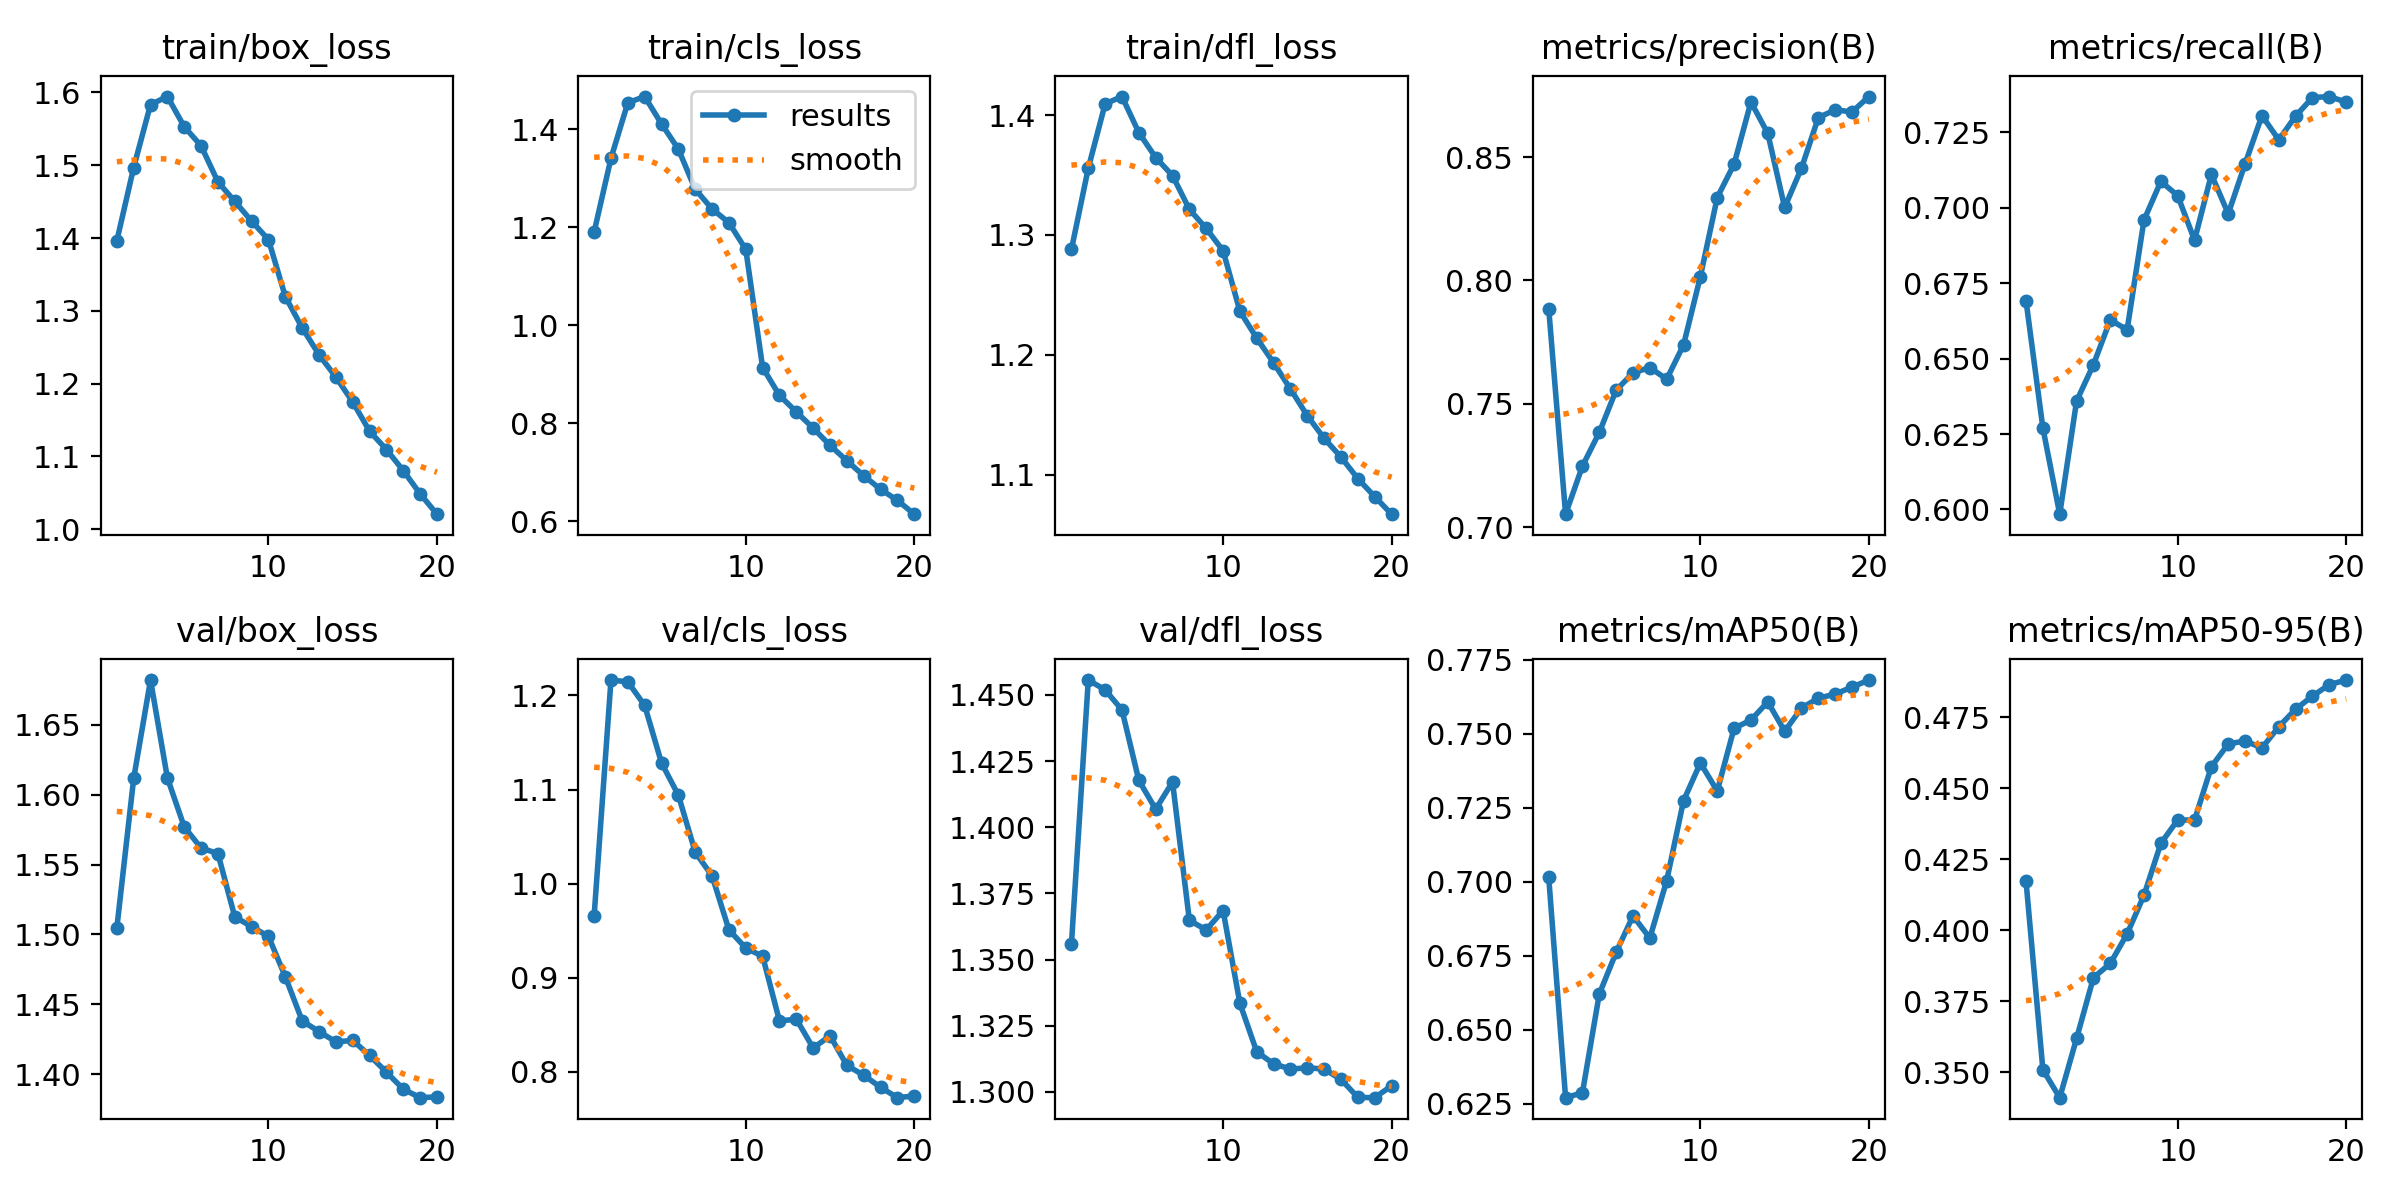

In [28]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


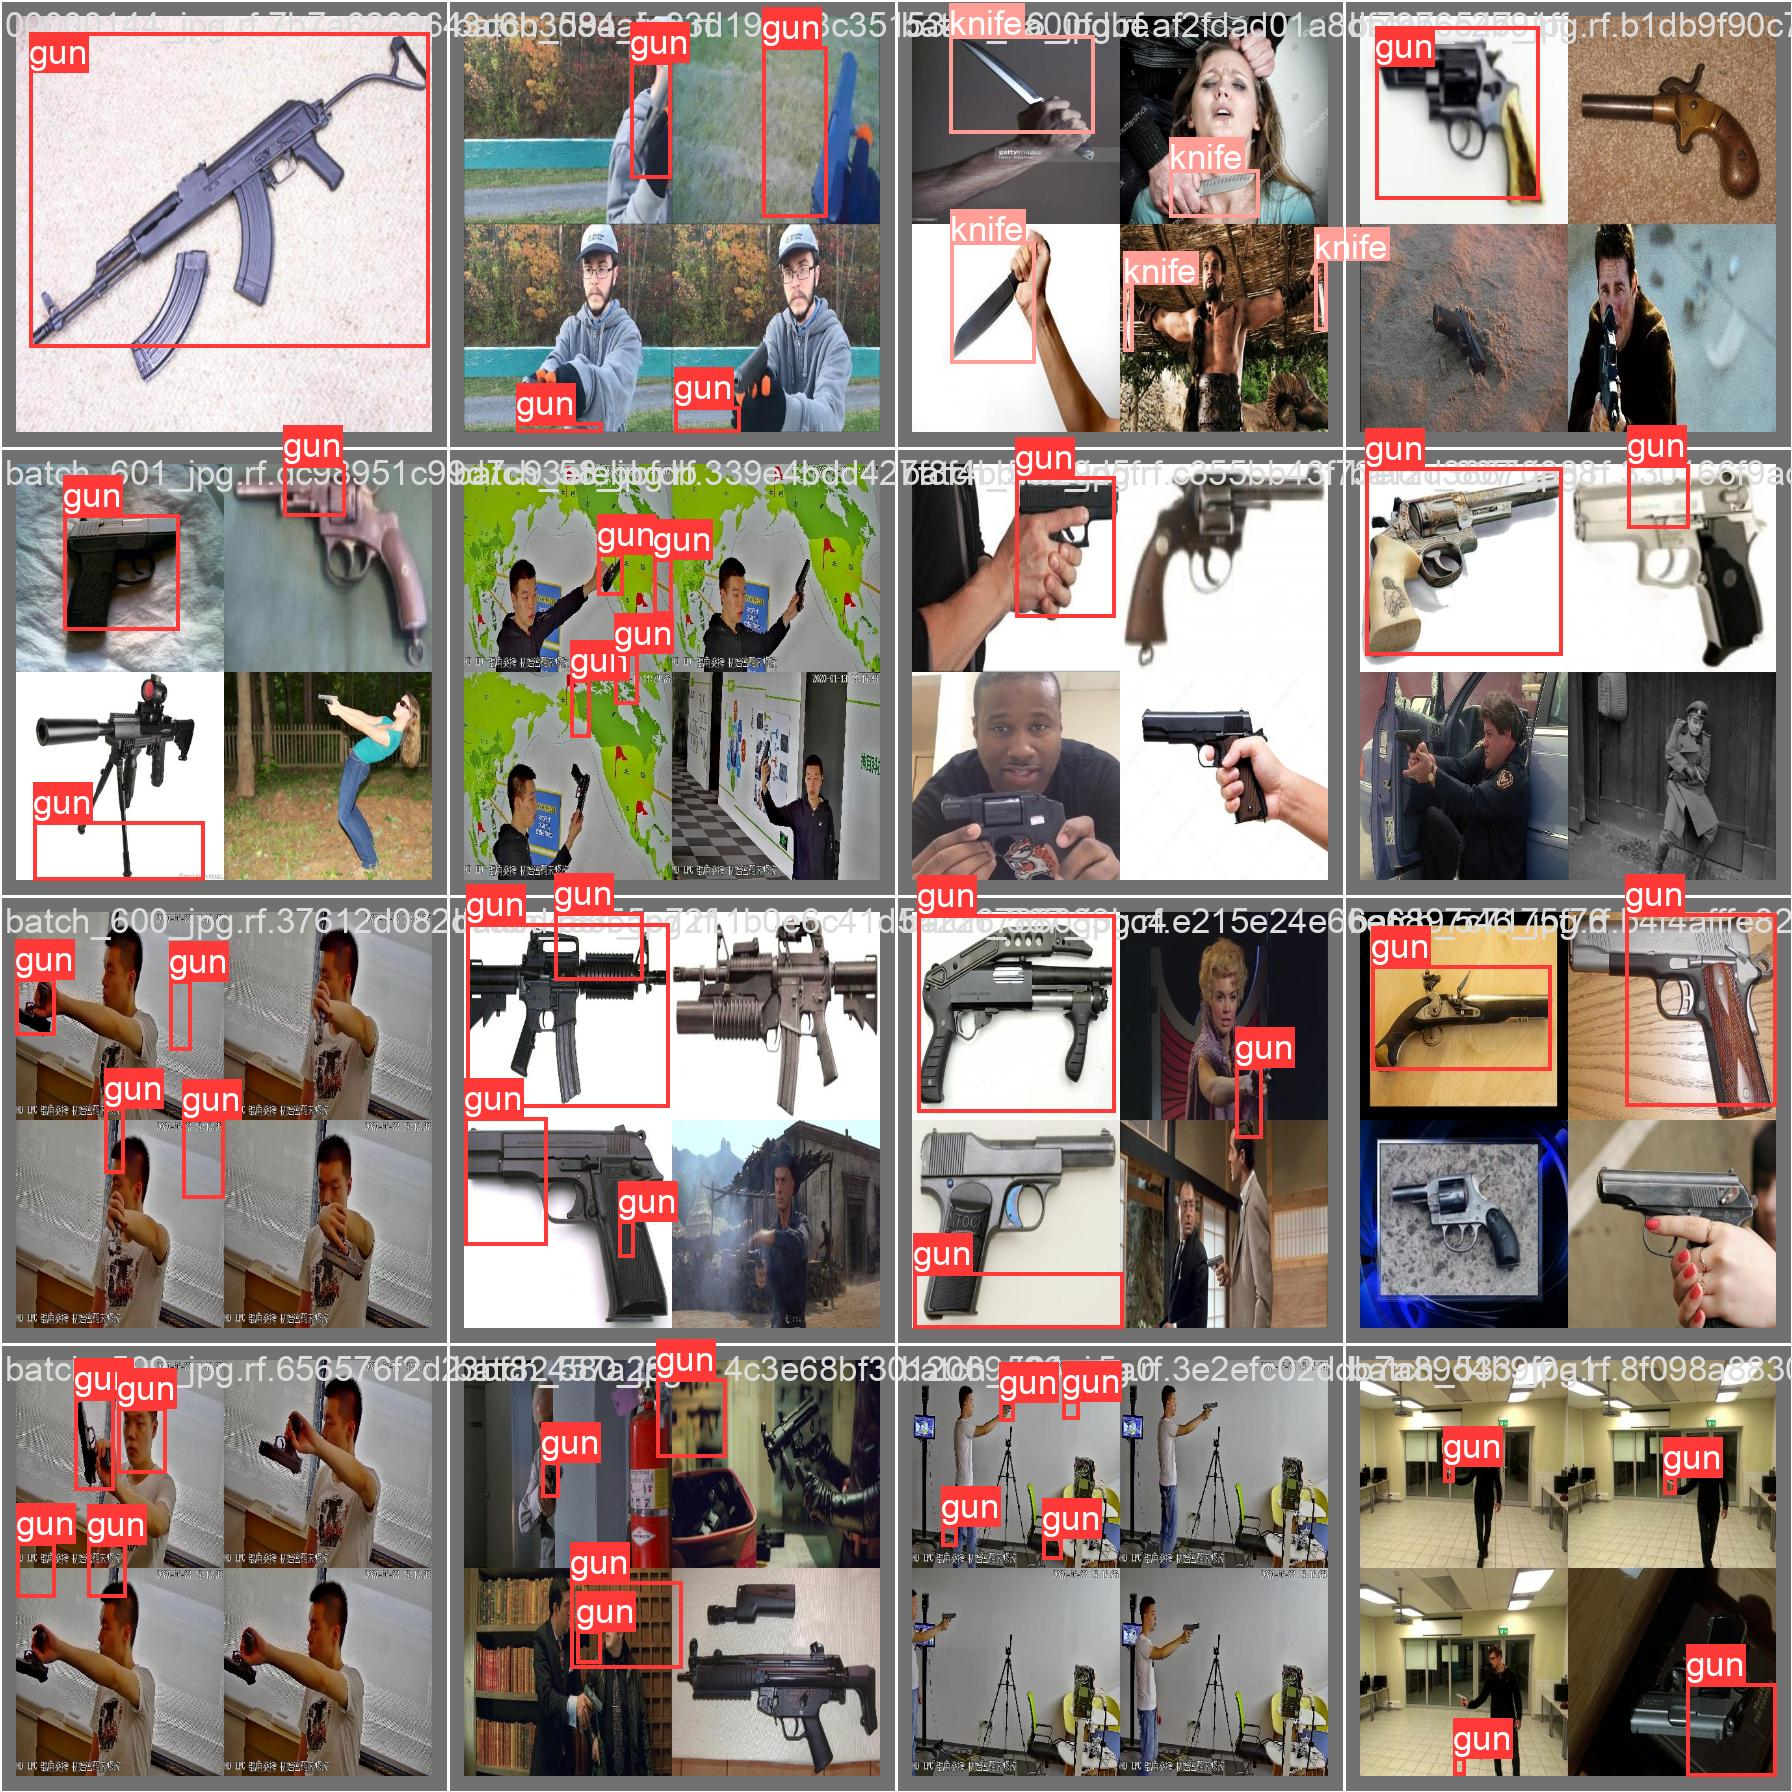

In [29]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_labels.jpg', width=600)

/content


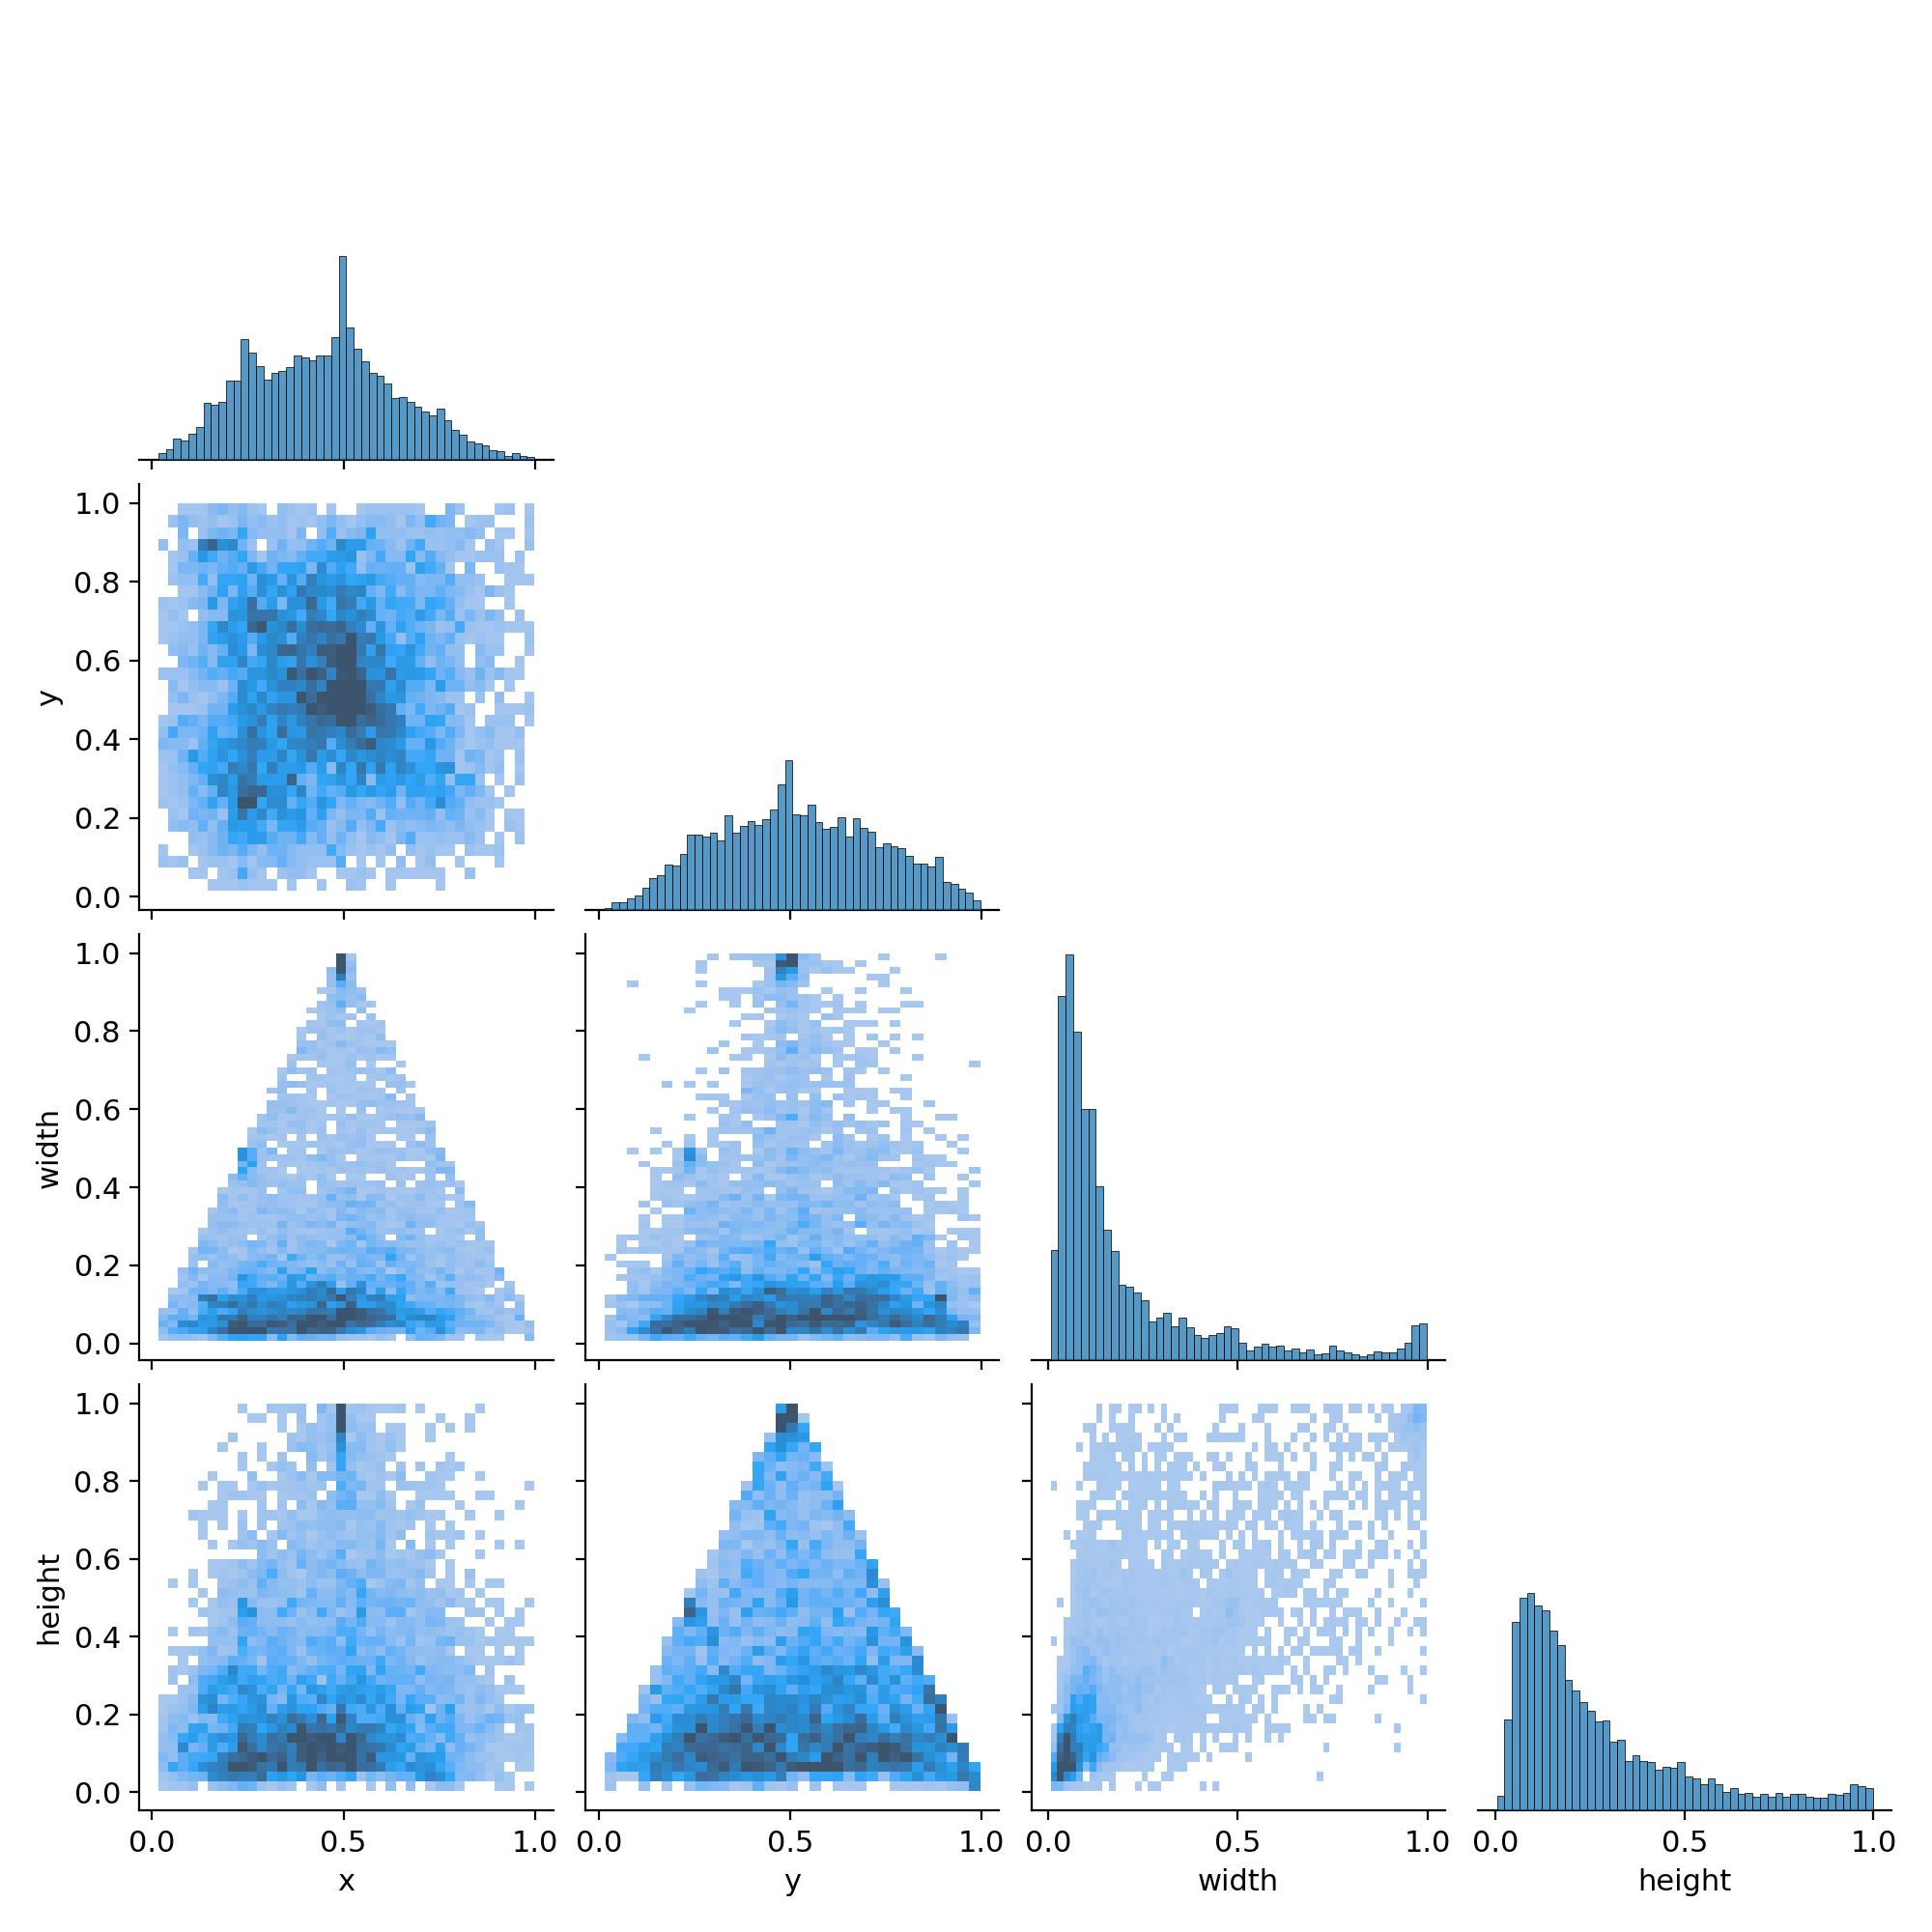

In [30]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/labels_correlogram.jpg', width=600)

In [16]:
%cd {HOME}
#{HOME}/drive/MyDrive/model/best.pt
#{HOME}/runs/detect/train3/weights/best.pt
!yolo task=detect mode=val model={HOME}/drive/MyDrive/model/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/guns_n_knives-1/valid/labels.cache... 1933 images, 0 backgrounds, 0 corrupt: 100% 1933/1933 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 121/121 [00:42<00:00,  2.84it/s]
                   all       1933       2766      0.862      0.732      0.754      0.499
                   gun       1933       1534       0.76      0.522      0.544      0.306
                 knife       1933       1232      0.963      0.942      0.964      0.692
Speed: 0.8ms preprocess, 12.8ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [13]:
%cd {HOME}
URL = 'https://content.osgnetworks.tv/firearmsnews/content/photos/fixed-blade-edc-t-kell-knives-raider-01-1200x800.jpg'
!yolo task=detect mode=predict model={HOME}/drive/MyDrive/model/last.pt conf=0.25 source={URL} save=True

/content
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

100% 296k/296k [00:00<00:00, 5.86MB/s]
image 1/1 /content/fixed-blade-edc-t-kell-knives-raider-01-1200x800.jpg: 544x800 1 gun, 1 knife, 90.7ms
Speed: 4.6ms preprocess, 90.7ms inference, 1988.5ms postprocess per image at shape (1, 3, 544, 800)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


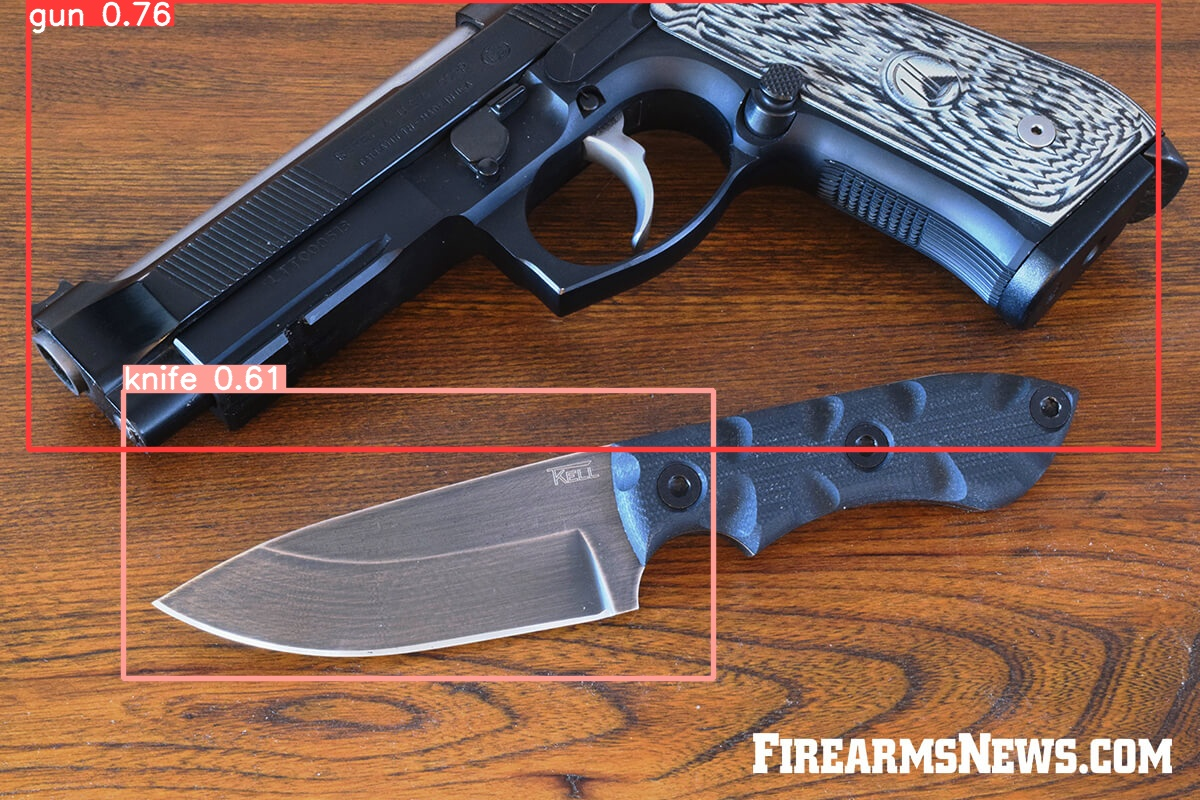

In [33]:
Image(filename=f'{HOME}/runs/detect/predict/fixed-blade-edc-t-kell-knives-raider-01-1200x800.jpg', width=600)

In [ ]:
!yolo export model={HOME}/drive/MyDrive/model/best.pt  format=torchscriMODpt